In [6]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# Uyarıları Kaldıralım
warnings.filterwarnings("ignore")

In [8]:
# uyarıları filtrele
warnings.filterwarnings("ignore")
# verisetini aldık
data = pd.read_csv('datasets_558169_1015398_breast-cancer-wisconsin.csv',delimiter=',')
data.head()

,id,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
# ID sütunu gereksiz kaldıralım
data.drop(['id'], inplace=True, axis=1)
data.replace('?', -99999, inplace=True) # ? verisini sayı ile değiştirdik

In [10]:
# Verisetini kopyaladık ve boş veri olan satırları kaldırdık
dataframe = data.copy()
dataframe = dataframe.dropna()
dataframe.head()

,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


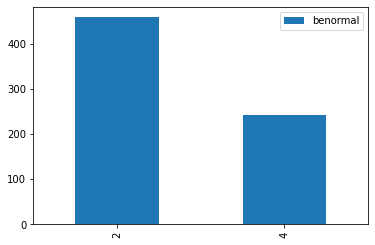

In [11]:
# Çıktı verilerinin dağılımını gösterelim
count = data.benormal.value_counts()
count.plot(kind='bar')
plt.legend()

In [12]:
# Son sütundaki 2,4 çıktısını 0,1 yaptık
data['benormal'] = data['benormal'].map(lambda x: 1 if x == 4 else 0)

In [13]:
# Girdi parametreleri
X = data.iloc[:,0:9]
# Çıktı parametresi
y = data.iloc[:,-1]

In [14]:
# Min max normalleştirme
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
# train test verisi ayırma
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(559, 9) (559,)
(140, 9) (140,)


In [16]:
# Random Forest Modelimizi oluşturalım
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)

In [17]:
# Modeli Eğitelim
history = model.fit(X_train,y_train)

In [18]:
# Ortaya çıkan ağacı görselleştirelim
estimator = model.estimators_[5]

In [19]:
girdi_isimleri = data.columns[0:-1]
cikti_verileri = np.array(['benign','malignant'])
print(girdi_isimleri)
print(cikti_verileri)

Index(['clumpthickness', 'uniformcellsize', 'uniformcellshape', 'margadhesion',
       'epithelial', 'barenuclei', 'blandchromatin', 'normalnucleoli',
       'mitoses'],
      dtype='object')
['benign' 'malignant']


In [21]:
# Tahminler
Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [23]:
# Konfüsyon Matris
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[91  3]
 [ 0 46]]


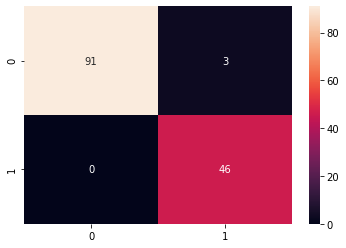

In [24]:
sns.heatmap(cm,annot=True)

In [25]:
# Model Performans Sonuçları
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print('Confusion Matrix :')
print(cm) 
print('Accuracy Score :',accuracy_score(y_test, Y_pred))
print('Report : ')
print(classification_report(y_test, Y_pred))

Confusion Matrix :
[[91  3]
 [ 0 46]]
Accuracy Score : 0.9785714285714285
Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        94
           1       0.94      1.00      0.97        46

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

